In [33]:
import os
SEED = 123
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.externals import joblib
import qgrid
def gview(data):
    return(qgrid.show_grid(data,show_toolbar=True,grid_options={'forceFitColumns': False,'highlightSelectedCell': True,'highlightSelectedRow': True}))
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

random.seed(123)
# -----------FUNCTIONS ------------
%run global_functions.py
%run viz_functions.py
%run dataprep_functions.py
%run Retention_func.py

curr_dir = os.getcwd()
print("current directory:\n\t\t",curr_dir)

os.chdir(curr_dir)

folder_list=['input_data','temp_data','submission']

for iin in folder_list:
    if not os.path.exists(f'{iin}'):
        os.makedirs(f'{iin}')   
    
#data_locn = '/home/jovyan/jupyter/notebooks/AIG_Retention/input_data'

from datetime import datetime
t_stamp = datetime.now().strftime("%d-%m-%Y_%I-%M-%S_%p")
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 4]
plt.style.use("fivethirtyeight")
# if False:
#     test_output.to_csv(f'output_data/output_june_decile_{t_stamp}.csv',index=False)

current directory:
		 D:\data\Nabi_Av\janatahack_bank


In [3]:
filename = os.listdir('input_data/')
filename

['sample_submission_HSqiq1Q.csv', 'test_fjtUOL8.csv', 'train_fNxu4vz.csv']

In [4]:
test_df  =  pd.read_csv(f'input_data/{filename[1]}',encoding = 'latin');print('****TEST****',test_df.shape)
train_df  =  pd.read_csv(f'input_data/{filename[2]}',encoding = 'latin');print('****TRAIN****',test_df.shape)
train_df  = data_basic_clean(train_df)
test_df  = data_basic_clean(test_df)

****TEST**** (109541, 13)
****TRAIN**** (109541, 13)


In [10]:
cols_cat = get_catcolnames(train_df)
cols_num = get_numcolnames(train_df)
print('CATEGORICAL COLUMNS ARE:',cols_cat)
print('-'*100)
print('NUMERICAL COLUMNS ARE:',cols_num)

CATEGORICAL COLUMNS ARE: ['loan_amount_requested', 'length_employed', 'home_owner', 'income_verified', 'purpose_of_loan', 'gender']
----------------------------------------------------------------------------------------------------
NUMERICAL COLUMNS ARE: ['loan_id', 'annual_income', 'debt_to_income', 'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts', 'total_accounts', 'interest_rate']


# TARGET

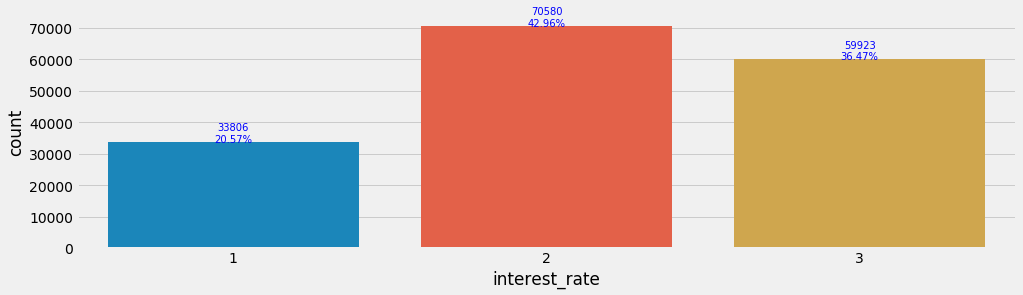

In [37]:
cat1_plot(train_df,'interest_rate',p=0)

# CATEGORICAL ANALYSIS W-R-T TARGET

home_owner
NotRenwed% is not present in  home_owner
NR_count is not present in  home_owner
income_verified
NotRenwed% is not present in  income_verified
NR_count is not present in  income_verified
gender
NotRenwed% is not present in  gender
NR_count is not present in  gender


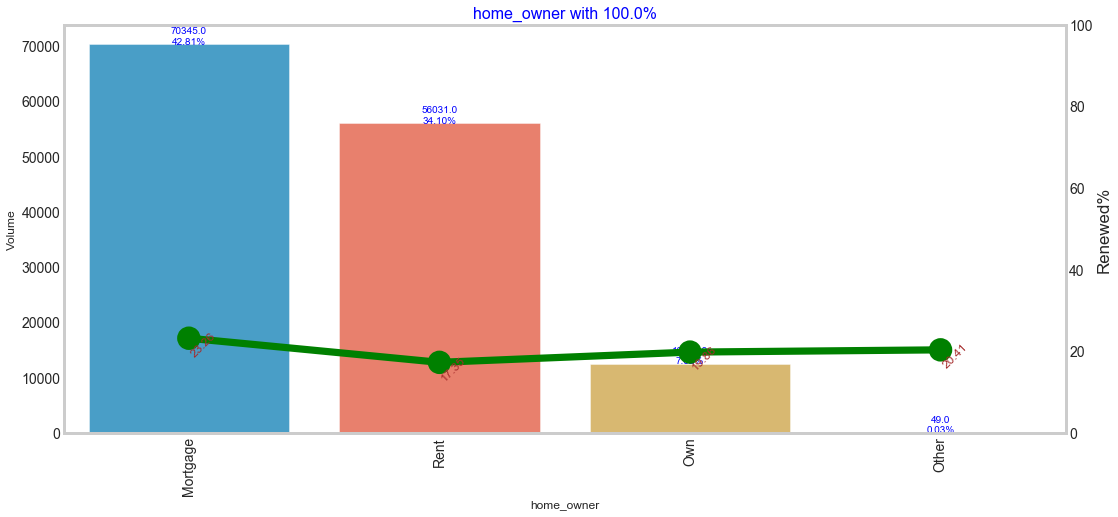

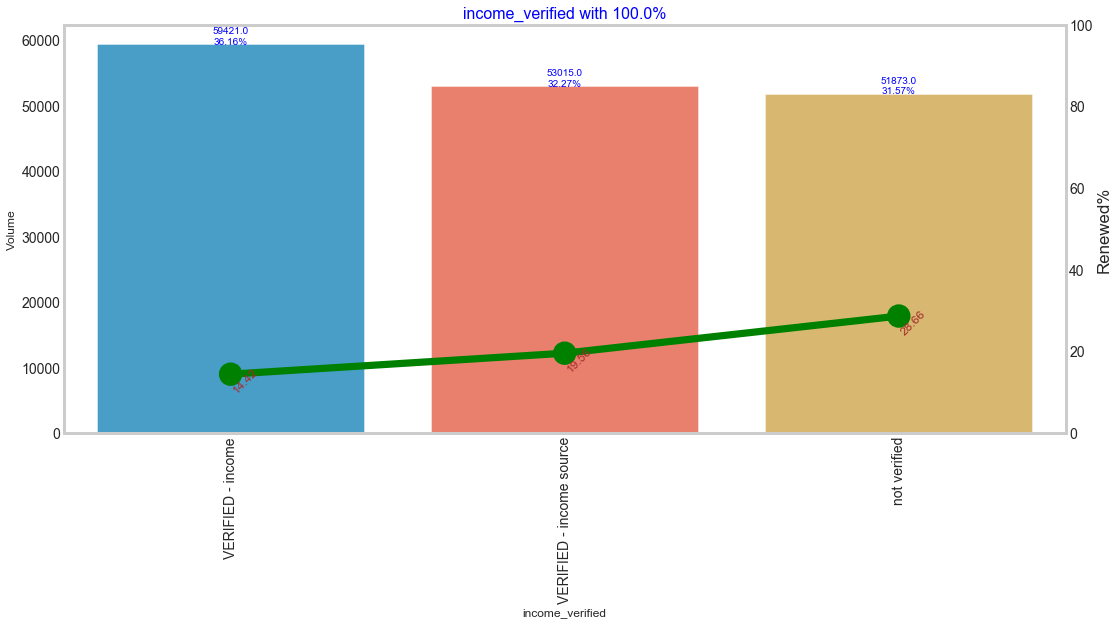

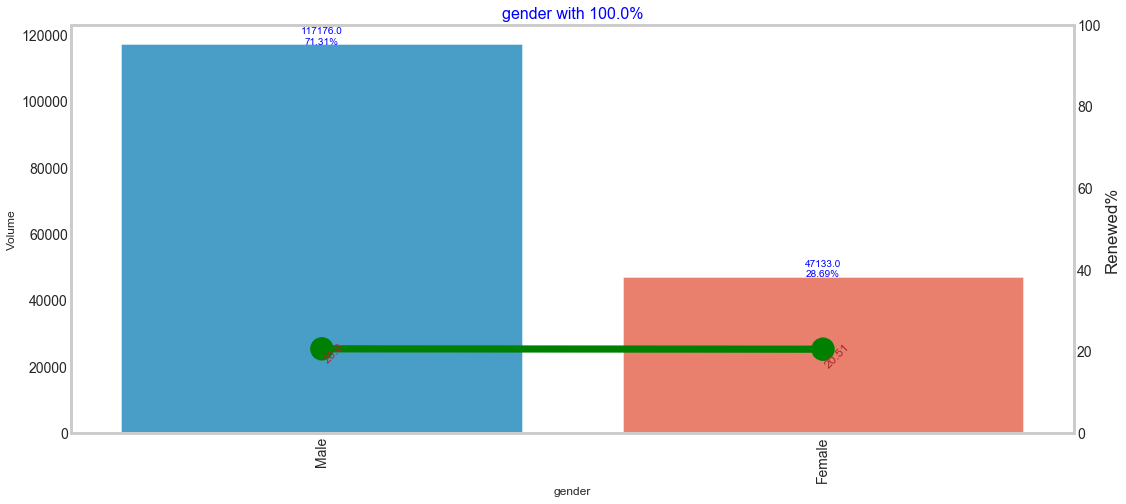

In [41]:
for i in cols_cat:    
    if len(train_df[f'{i}'].unique()) < 10:
        print(i)
        call_univariate_cat_y2label_indiv(train_df,f'{i}','interest_rate',Top_n = 5 ,thres = np.nan , ytag = 1,prt='N')

In [ ]:
for i in cols_cat:    
    if len(merged[f'{i}'].unique()) < 10:
        print(i)
        call_univariate_cat_y2label_indiv(merged,f'{i}','survived',Top_n = 5 ,thres = np.nan , ytag = 1,prt='Y')